<a href="https://colab.research.google.com/github/luisriverodiaz/CoderHouse_DataScienceI_EntregaFinal/blob/main/ProyectoDS_ParteIII_Luis_Rivero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final
## Alumno Luis Rivero
## Comisión 60935
## Data Science I: Fundamentos para la Ciencia de Datos

# Análisis de Satisfacción de los Pasajeros de una Aerolínea
## Abstract
El estudio inicia para una empresa en el rubro de aerolínea, donde lo que busca es realizar una análisis para entender cómo mejorar la preferencia de sus clientes hacia su empresa. Para esto se realiza una encuesta a más de 100.000 usuarios, recopilando información acerca de la satisfacción que percibieron en su experiencia de volar.

Hace ya varios años que el sector se ha vuelto más competitivo, han surgido varios compañias "Low Cost", donde buscan cada detalle para poder reducir costos, pero hay que cuidar que esa baja de costos no redunde en una experiencia de usuario negativa. Es por esto que poder conocer cómo piensa el usuario es clave para poder desarrollar un producto, que cuide el costo, pero que maximice positivamente la experiencia de viajar con nuestra compañía.

El resultado del análisis realizado está pensado para ser presentado a los directivos de la aerolínea, para que puedan realizar cambios que redunden en mayor satisfacción en los pasajeros y mejores resultados económicos para la empresa.

El dataset lo obtuve de [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv), después de haber analizado diferentes alternativas, éste me pareció que permitía hacer un buen análisis y aplicar lo estudiado en clase.

## Objetivo
El objetivo de este trabajo es entender cómo piensa el usuario medio de la aerolínea, la relación que puede existir entre nuestras acciones y la experiencia del usuario.

Para esto es clave entender y poder responder a ciertas preguntas:
*   ¿Cuáles son nuestros pasajeros (edad, sexo, origen,etc)?
*   ¿Por qué viajan (negocios, motivos personales)?
*   ¿Qué prefieren al momento de reservar (precio o lo que incluye el servicio)?
*   ¿Qué tan satisfechos están después de haber viajado con nosotros?

# Hipótesis
Identificamos como hipótesis, que la satisfacción del cliente no está solamente relacionada al precio que paga por el boleto de avión, tenemos la percepción que los clientes regulares y sobre todo los que viajan por negocios, están menos propensos a identificar problemas que le generen insatisfacción.

##Imports y carga de datos

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import time

from IPython.display import Markdown
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Ignoro los warnings
import warnings
warnings.filterwarnings("ignore")


In [99]:
# Cargo el dataset
# df = pd.read_csv('https://raw.githubusercontent.com/luisriverodiaz/CoderHouse_DataScienceI_EntregaFinal/main/train.csv')
# Se debería poder acceder de cualquiera de las dos formas
df = pd.read_csv('https://github.com/luisriverodiaz/CoderHouse_DataScienceI_EntregaFinal/raw/main/train.csv')

# Significado de los campos del dataset

En todos los casos que se responde nivel de satisfacción, 0 significa que no aplica (por ejemplo, no tenía wifi a bordo o no respondió), y la valoración es de 1 a 5

| Campo Original  | Campo Español  |   Significado  |
|---| |---|
| (sin nombre)   | |   Identificador de línea Auto incremental |
| id   | |   Identificador del encuestado |
| Gender   | Genero |   Género del pasajero (Masculino o Feminino) |
| Customer type   | Tipo Cliente |   Tipo de cliente (frecuente o no)  |
| Age   | Edad |   Edad del pasajero  |
| Type of travel  | Tipo Viaje |   Motivo del viaje (personal o de negocios)  |
| Class   | Clase |   Tipo de clase eligido (Bussines, Eco o Eco plus) |
| Flight distance   | Distancia Vuelo  |   La distancia del vuelo  |
| Inflight wifi service   | Wifi a Bordo |   Nivel de satisfacción del servicio de wifi abordo   |
| Departure/Arrival time convenient  | Horario Conveniente |   Nivel de satisfacción la conveniencia del horario de salida/llegada  |
| Ease of Online booking   | Facilidad Compra Online |    Nivel de satisfacción de la facilidad en la compra online |
| Gate location   | Ubicacion Puerta Embarque |    Nivel de satisfacción de la ubicación de puerta de embarque  |
| Food and drink   | Comida y Bebida |    Nivel de satisfacción de la comida y la bebida  |
| Online boarding  | Checkin Online |    Nivel de satisfacción del checkin online  |
| Seat comfort   | Comodiad Asiento |    Nivel de satisfacción de la comodidad del asiento |
| Inflight entertainment   | Entretenimiento a Bordo |    Nivel de satisfacción del entretenimiento abordo  |
| On-board service   | Servicio a Bordo |    Nivel de satisfacción del servicio a bordo  |
| Leg room service  | Espacio Piernas |   Nivel de satisfacción del espacio para las piernas en el asiento  |
| Baggage handling  | Manejo Equipaje |   Nivel de satisfacción del manejo del equipaje  |
| Checkin service  | Servicio Checkin |   Nivel de satisfacción del servicio de checkin  |
| inflight_service  | Servicio Vuelo |   Nivel de satisfacción del servicio en vuelo  |
| Cleanliness  | Limpieza |   Nivel de satisfacción de la limpieza  |
| Departure delay in minutes  | Retraso Salida |   Minutos de retraso de salida  |
| Arrival delay in minutes  | Retraso Llegada |   Minutos de retraso de llegada  |
| satisfaction  | Satisfaccion |   Nivel de satisfacción con la aerolínea (satisfecho o neutral/insatisfecho)  |

In [100]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [101]:
df.shape

(103904, 25)

# Procesamiento de los datos

In [102]:
# Las dos primeras columnas carecen de significado para el análisis de este
# trabajo. Procedo a eliminarlas
df = df.drop(columns=['Unnamed: 0', 'id'])
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [103]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [104]:
# Reviso cantidad de datos de cada columna y el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [105]:
# Para simplificar el análisis a cualquier persona que lea el trabajo, renombro
# las columnas al español
df.columns=['Genero','Tipo Cliente','Edad','Tipo Viaje','Clase','Distancia Vuelo','Wifi a Bordo','Horario Conveniente','Facilidad Compra Online','Ubicacion Puerta Embarque','Comida y Bebida','Checkin Online','Comodidad Asiento','Entretenimiento a Bordo','Servicio a Bordo','Espacio Piernas','Manejo Equipaje','Servicio Checkin','Servicio Vuelo','Limpieza','Retraso Salida','Retraso Llegada','Satisfaccion']

In [106]:
# Reviso cómo quedaron los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Genero                     103904 non-null  object 
 1   Tipo Cliente               103904 non-null  object 
 2   Edad                       103904 non-null  int64  
 3   Tipo Viaje                 103904 non-null  object 
 4   Clase                      103904 non-null  object 
 5   Distancia Vuelo            103904 non-null  int64  
 6   Wifi a Bordo               103904 non-null  int64  
 7   Horario Conveniente        103904 non-null  int64  
 8   Facilidad Compra Online    103904 non-null  int64  
 9   Ubicacion Puerta Embarque  103904 non-null  int64  
 10  Comida y Bebida            103904 non-null  int64  
 11  Checkin Online             103904 non-null  int64  
 12  Comodidad Asiento          103904 non-null  int64  
 13  Entretenimiento a Bordo    10

In [107]:
# Reviso los valores presentes en cada columna para determinar si hay alguno que deba ser modificado
for col in df.columns:
  display(Markdown('##<ins>Datos Únicos para la Columna %s:</ins>'%(col)))
  print(df[col].unique())

##<ins>Datos Únicos para la Columna Genero:</ins>

['Male' 'Female']


##<ins>Datos Únicos para la Columna Tipo Cliente:</ins>

['Loyal Customer' 'disloyal Customer']


##<ins>Datos Únicos para la Columna Edad:</ins>

[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]


##<ins>Datos Únicos para la Columna Tipo Viaje:</ins>

['Personal Travel' 'Business travel']


##<ins>Datos Únicos para la Columna Clase:</ins>

['Eco Plus' 'Business' 'Eco']


##<ins>Datos Únicos para la Columna Distancia Vuelo:</ins>

[ 460  235 1142 ...  974 1479  400]


##<ins>Datos Únicos para la Columna Wifi a Bordo:</ins>

[3 2 4 1 5 0]


##<ins>Datos Únicos para la Columna Horario Conveniente:</ins>

[4 2 5 3 1 0]


##<ins>Datos Únicos para la Columna Facilidad Compra Online:</ins>

[3 2 5 4 1 0]


##<ins>Datos Únicos para la Columna Ubicacion Puerta Embarque:</ins>

[1 3 2 5 4 0]


##<ins>Datos Únicos para la Columna Comida y Bebida:</ins>

[5 1 2 4 3 0]


##<ins>Datos Únicos para la Columna Checkin Online:</ins>

[3 5 2 1 4 0]


##<ins>Datos Únicos para la Columna Comodidad Asiento:</ins>

[5 1 2 3 4 0]


##<ins>Datos Únicos para la Columna Entretenimiento a Bordo:</ins>

[5 1 2 3 4 0]


##<ins>Datos Únicos para la Columna Servicio a Bordo:</ins>

[4 1 2 3 5 0]


##<ins>Datos Únicos para la Columna Espacio Piernas:</ins>

[3 5 4 2 1 0]


##<ins>Datos Únicos para la Columna Manejo Equipaje:</ins>

[4 3 5 1 2]


##<ins>Datos Únicos para la Columna Servicio Checkin:</ins>

[4 1 3 5 2 0]


##<ins>Datos Únicos para la Columna Servicio Vuelo:</ins>

[5 4 3 1 2 0]


##<ins>Datos Únicos para la Columna Limpieza:</ins>

[5 1 2 3 4 0]


##<ins>Datos Únicos para la Columna Retraso Salida:</ins>

[  25    1    0   11    9    4   28   43   49    7   17   52   54   27
   18   19    3  109   23    8   14   10   51   39   13   30   64   20
   45   44   31   81   35   67   22   40   91   21   15   29  105   12
  162   24  141    6   34    2   97   16   99   37   66   53   36  209
   60  149   26    5   59   62  113   38   83  176   46   73  199   56
   93   70   80   96   57   95   74  172   63  175  143   48   47  101
  118   76  220   33   55  232  170  173  124  112   94  243  128   92
  270   90  110   50  144   71  315  158   88   65  111   32  156   41
  154  150  228   72  137  126  161   42  174  103  313  136  160  412
   69  185  114  135  142  147   85  235  125  391   84  138  102  196
  140   77  187  131   82  100   86  165   87  129  204  435  166  177
  123  139  116  108  167  285   61  117  106  190  168  211   89  324
   75  202  290  189  203  120  157  119   68  299  292   78  258  104
  121   58  222  317  320  200  134  248   79  240  169   98  249  145
  238 

##<ins>Datos Únicos para la Columna Retraso Llegada:</ins>

[1.800e+01 6.000e+00 0.000e+00 9.000e+00 2.300e+01 8.000e+00 3.500e+01
 5.100e+01 1.000e+01 5.000e+00 4.000e+00 2.900e+01 4.400e+01 2.800e+01
 1.200e+01 1.200e+02 2.400e+01 1.000e+00 2.000e+01 3.100e+01 1.500e+01
 4.800e+01 2.600e+01 4.900e+01 2.000e+00 3.700e+01 5.000e+01 3.000e+00
 1.900e+01 7.200e+01 1.100e+01 3.400e+01 6.200e+01 2.700e+01 5.200e+01
 1.300e+01 8.200e+01 3.000e+01 1.600e+01 7.000e+00 1.220e+02 1.790e+02
 1.250e+02 1.700e+01       nan 8.900e+01 1.010e+02 1.400e+01 6.100e+01
 3.200e+01 3.300e+01 4.100e+01 1.910e+02 1.380e+02 5.300e+01 2.200e+01
 5.700e+01 6.500e+01 7.600e+01 1.070e+02 9.200e+01 1.640e+02 2.100e+01
 4.000e+01 5.500e+01 1.850e+02 6.300e+01 7.700e+01 8.600e+01 9.100e+01
 1.000e+02 5.400e+01 3.600e+01 7.000e+01 1.390e+02 6.700e+01 1.630e+02
 1.280e+02 1.800e+02 9.300e+01 1.210e+02 4.500e+01 1.050e+02 1.260e+02
 5.600e+01 7.300e+01 2.120e+02 8.800e+01 2.410e+02 1.720e+02 1.750e+02
 1.110e+02 9.900e+01 2.500e+01 4.200e+01 2.260e+02 4.600e+01 1.310e+02
 2.600

##<ins>Datos Únicos para la Columna Satisfaccion:</ins>

['neutral or dissatisfied' 'satisfied']


In [108]:
# Reviso las columnas que tienen valores de tipo object ya que son categóricas,
# para traducirlas al español

df.Genero.value_counts()

Genero
Female    52727
Male      51177
Name: count, dtype: int64

In [109]:
diccionario_genero={'Female':'Femenino','Male':'Masculino'}
df.Genero = df.Genero.replace(diccionario_genero)
df.Genero.value_counts()

Genero
Femenino     52727
Masculino    51177
Name: count, dtype: int64

In [110]:
df['Tipo Cliente'].value_counts()

Tipo Cliente
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [111]:
diccionario_tipo_cliente = {'Loyal Customer':'Frecuente','disloyal Customer':'No Frecuente'}
df['Tipo Cliente'] = df['Tipo Cliente'].replace(diccionario_tipo_cliente)
df['Tipo Cliente'].value_counts()

Tipo Cliente
Frecuente       84923
No Frecuente    18981
Name: count, dtype: int64

In [112]:
df['Tipo Viaje'].value_counts()

Tipo Viaje
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [113]:
diccionario_tipo_viaje = {'Business travel':'Negocios','Personal Travel':'Personal'}
df['Tipo Viaje'] = df['Tipo Viaje'].replace(diccionario_tipo_viaje)
df['Tipo Viaje'].value_counts()

Tipo Viaje
Negocios    71655
Personal    32249
Name: count, dtype: int64

In [114]:
df.Clase.value_counts()
# Queda bastante claro con esta nomenclatura

Clase
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [115]:
df.Satisfaccion.value_counts()

Satisfaccion
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [116]:
diccionario_satisfaccion={'satisfied':'Satisfecho','neutral or dissatisfied':'Neutral/Insatisfecho'}
df.Satisfaccion = df.Satisfaccion.replace(diccionario_satisfaccion)
df.Satisfaccion.value_counts()

Satisfaccion
Neutral/Insatisfecho    58879
Satisfecho              45025
Name: count, dtype: int64

In [117]:
# Voy a corregir los tipos de datos, cambiando a a categórico todos los campos que lo ameritan
indices_categoricos = [0,1,3,4] + [22]
df[df.columns[indices_categoricos]] = df[df.columns[indices_categoricos]].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Genero                     103904 non-null  category
 1   Tipo Cliente               103904 non-null  category
 2   Edad                       103904 non-null  int64   
 3   Tipo Viaje                 103904 non-null  category
 4   Clase                      103904 non-null  category
 5   Distancia Vuelo            103904 non-null  int64   
 6   Wifi a Bordo               103904 non-null  int64   
 7   Horario Conveniente        103904 non-null  int64   
 8   Facilidad Compra Online    103904 non-null  int64   
 9   Ubicacion Puerta Embarque  103904 non-null  int64   
 10  Comida y Bebida            103904 non-null  int64   
 11  Checkin Online             103904 non-null  int64   
 12  Comodidad Asiento          103904 non-null  int64   
 13  Entretenimient

In [118]:
# Reviso la cantidad de nulos
df.isnull().sum()

Genero                         0
Tipo Cliente                   0
Edad                           0
Tipo Viaje                     0
Clase                          0
Distancia Vuelo                0
Wifi a Bordo                   0
Horario Conveniente            0
Facilidad Compra Online        0
Ubicacion Puerta Embarque      0
Comida y Bebida                0
Checkin Online                 0
Comodidad Asiento              0
Entretenimiento a Bordo        0
Servicio a Bordo               0
Espacio Piernas                0
Manejo Equipaje                0
Servicio Checkin               0
Servicio Vuelo                 0
Limpieza                       0
Retraso Salida                 0
Retraso Llegada              310
Satisfaccion                   0
dtype: int64

In [119]:
# Calculo el porcentajde nulos sobre el total para ver la relevancia
porcentaje = ((df.isnull().sum() / len(df))*100).round(2).sort_values(ascending = False)
print(porcentaje)

Retraso Llegada              0.3
Genero                       0.0
Comodidad Asiento            0.0
Retraso Salida               0.0
Limpieza                     0.0
Servicio Vuelo               0.0
Servicio Checkin             0.0
Manejo Equipaje              0.0
Espacio Piernas              0.0
Servicio a Bordo             0.0
Entretenimiento a Bordo      0.0
Checkin Online               0.0
Tipo Cliente                 0.0
Comida y Bebida              0.0
Ubicacion Puerta Embarque    0.0
Facilidad Compra Online      0.0
Horario Conveniente          0.0
Wifi a Bordo                 0.0
Distancia Vuelo              0.0
Clase                        0.0
Tipo Viaje                   0.0
Edad                         0.0
Satisfaccion                 0.0
dtype: float64


In [120]:
# Completo los nulos con la mediana y verifico
df['Retraso Llegada'].fillna(df['Retraso Llegada'].median(axis = 0), inplace = True)
df.isnull().sum()

Genero                       0
Tipo Cliente                 0
Edad                         0
Tipo Viaje                   0
Clase                        0
Distancia Vuelo              0
Wifi a Bordo                 0
Horario Conveniente          0
Facilidad Compra Online      0
Ubicacion Puerta Embarque    0
Comida y Bebida              0
Checkin Online               0
Comodidad Asiento            0
Entretenimiento a Bordo      0
Servicio a Bordo             0
Espacio Piernas              0
Manejo Equipaje              0
Servicio Checkin             0
Servicio Vuelo               0
Limpieza                     0
Retraso Salida               0
Retraso Llegada              0
Satisfaccion                 0
dtype: int64

In [121]:
# Ahora le puedo cambiar el tipo de dato a la columna Retraso Lllegada ya que no
# tiene más nulos
df[df.columns[21]] = df[df.columns[21]].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Genero                     103904 non-null  category
 1   Tipo Cliente               103904 non-null  category
 2   Edad                       103904 non-null  int64   
 3   Tipo Viaje                 103904 non-null  category
 4   Clase                      103904 non-null  category
 5   Distancia Vuelo            103904 non-null  int64   
 6   Wifi a Bordo               103904 non-null  int64   
 7   Horario Conveniente        103904 non-null  int64   
 8   Facilidad Compra Online    103904 non-null  int64   
 9   Ubicacion Puerta Embarque  103904 non-null  int64   
 10  Comida y Bebida            103904 non-null  int64   
 11  Checkin Online             103904 non-null  int64   
 12  Comodidad Asiento          103904 non-null  int64   
 13  Entretenimient

In [122]:
df.describe().round(1)

,Edad,Distancia Vuelo,Wifi a Bordo,Horario Conveniente,Facilidad Compra Online,Ubicacion Puerta Embarque,Comida y Bebida,Checkin Online,Comodidad Asiento,Entretenimiento a Bordo,Servicio a Bordo,Espacio Piernas,Manejo Equipaje,Servicio Checkin,Servicio Vuelo,Limpieza,Retraso Salida,Retraso Llegada
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0
mean,39.4,1189.4,2.7,3.1,2.8,3.0,3.2,3.3,3.4,3.4,3.4,3.4,3.6,3.3,3.6,3.3,14.8,15.1
std,15.1,997.1,1.3,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.2,38.6
min,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,40.0,843.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


# Análisis de los Insights
## Distribución por género
Cómo se reparten los pasajeros según su género

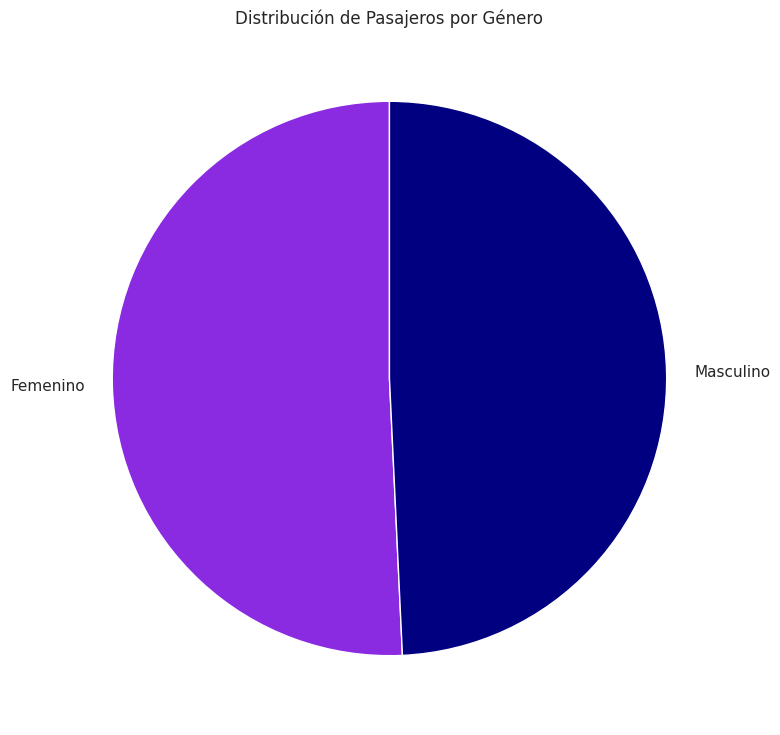

In [123]:
# Establezco el criterio por género
distribucion_por_genero = (df.Genero.value_counts()
                                    .to_frame('Cantidad').reset_index().rename(columns={'index':'Genero'}))
# Establezco el criterio por clase de asiento
distribucion_genero_asiento = (df.groupby(['Clase','Genero']).Genero.count()
                               .to_frame('Cantidad').reset_index().rename(columns={'index':'Genero'}))

# Grafico por Género
colores_genero = {'Masculino':'navy', 'Femenino':'blueviolet'}
figura_genero, ax = plt.subplots(figsize = (9,9))
ax.pie(distribucion_por_genero['Cantidad'], labels=distribucion_por_genero['Genero'], startangle=90, colors=[colores_genero[g] for g in distribucion_por_genero['Genero']])
ax.set_title('Distribución de Pasajeros por Género')
figura_genero.show()

## Significado del gráfico
La distribución entre hombres y mujeres es muy similar, un poco más de mujeres, pero en proporción no es una diferencia significativa

##Distribución de Pasajeros según Género y Clase de Asiento

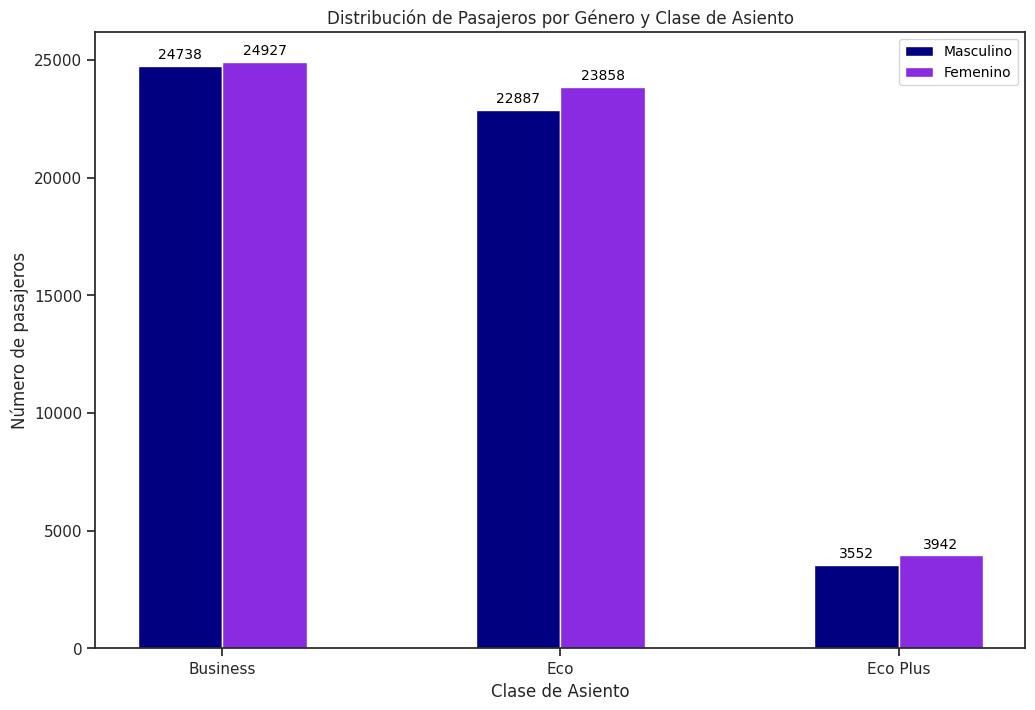

In [124]:
fig_distribucion_genero_asientos = plt.subplots(figsize = (12, 8))

grupo  = distribucion_genero_asiento.groupby(['Clase', 'Genero']).sum().unstack()

indice_lista = list(range(len(grupo)))

bar_masculino = plt.bar(indice_lista, grupo['Cantidad']['Masculino'], width = 0.25, label = 'Masculino', color = colores_genero['Masculino'])
bar_femenino = plt.bar([x + 0.25 for x in indice_lista], grupo['Cantidad']['Femenino'], width = 0.25, label = 'Femenino', color = colores_genero['Femenino'])

plt.style.use('default')
plt.title('Distribución de Pasajeros por Género y Clase de Asiento')
plt.xlabel('Clase de Asiento')
plt.ylabel('Número de pasajeros')
plt.legend()
plt.xticks([x + 0.25 / 2 for x in indice_lista], grupo.index)

#Agrego totales
for rect in bar_masculino.patches:
  plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for rect in bar_femenino.patches:
  plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

## Significado del gráfico
En cada clase de asiento, la distribución es muy uniforme entre hombres y mujeres, en cada una de las clases las mujeres superan por poco a los hombres

## Tipo de Cliente según el Género

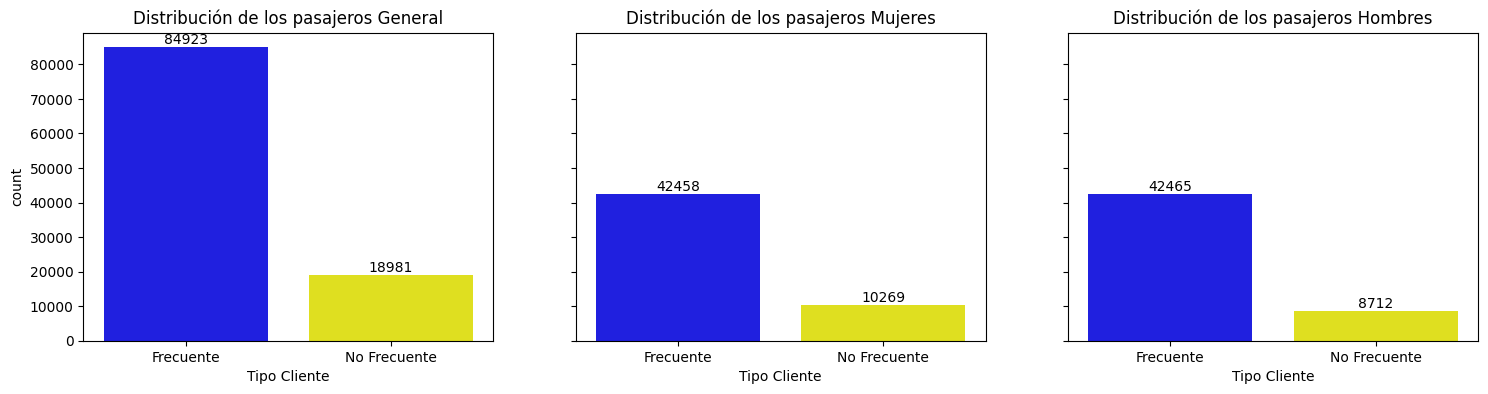

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colores_tipo_cliente = ["blue", "yellow"]
# Defino el orden de los tipos de viaje
order = ['Frecuente', 'No Frecuente']

for i, (gen_pas, genero) in enumerate(zip([['Masculino','Femenino'], ['Femenino'], ['Masculino']], ['General', 'Mujeres', 'Hombres'])):
    df_gen_pas = df[df['Genero'].isin(gen_pas)]

    sns.countplot(data = df_gen_pas, x = 'Tipo Cliente', ax = axs[i], order = order, palette = colores_tipo_cliente)
    axs[i].set_title('Distribución de los pasajeros ' + genero)

    for bar in axs[i].patches:
        valor = str(int(bar.get_height()))
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.show()

## Significado de los gráficos
Al igual que sucedía con la distribución en función de la clase de asiento, es muy similar la distribución para hombres y mujeres por tipo de cliente. En todos los casos, los clientes frecuentes superan con creces a los ocasionales

## Tipo de Viaje según Género

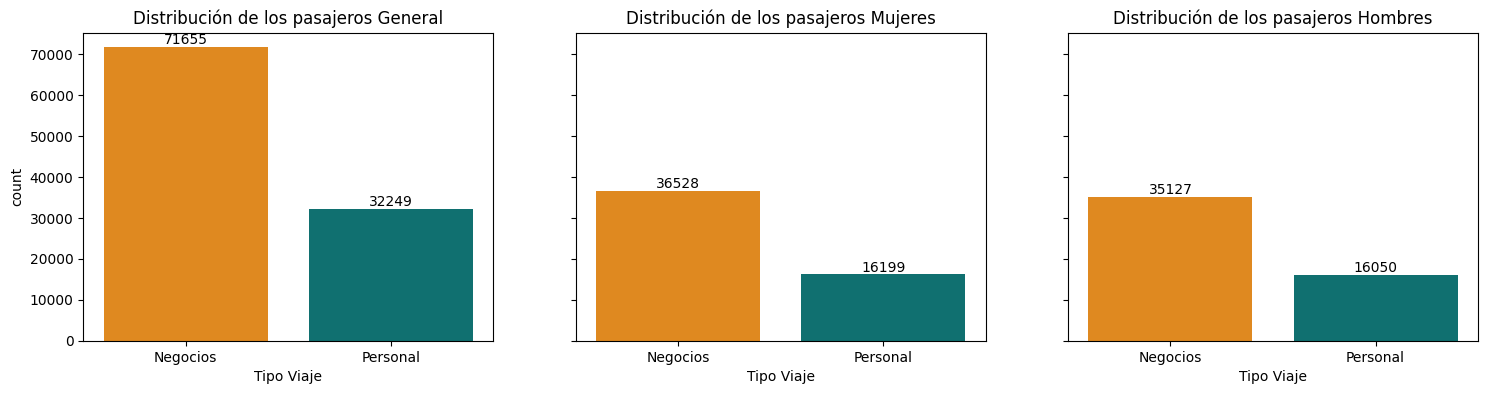

In [126]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colors = ["darkorange", "teal"]
# Defino el orden de los tipos de viaje
order = ['Negocios', 'Personal']

for i, (gen_pas, genero) in enumerate(zip([['Masculino','Femenino'], ['Femenino'], ['Masculino']], ['General', 'Mujeres', 'Hombres'])):
    df_gen_pas = df[df['Genero'].isin(gen_pas)]

    sns.countplot(data = df_gen_pas, x = 'Tipo Viaje', ax = axs[i], order = order, palette = colors)
    axs[i].set_title('Distribución de los pasajeros ' + genero)

    for bar in axs[i].patches:
        valor = str(int(bar.get_height()))
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.show()

## Significado de los gráficos
De los gráficos se puede concluir que la distribución entre hombres y mujeres por tipo de viaje es muy similar, pero es mucho más frecuente los viajes de negocios que los personales

## Tipo de Cliente según Edad

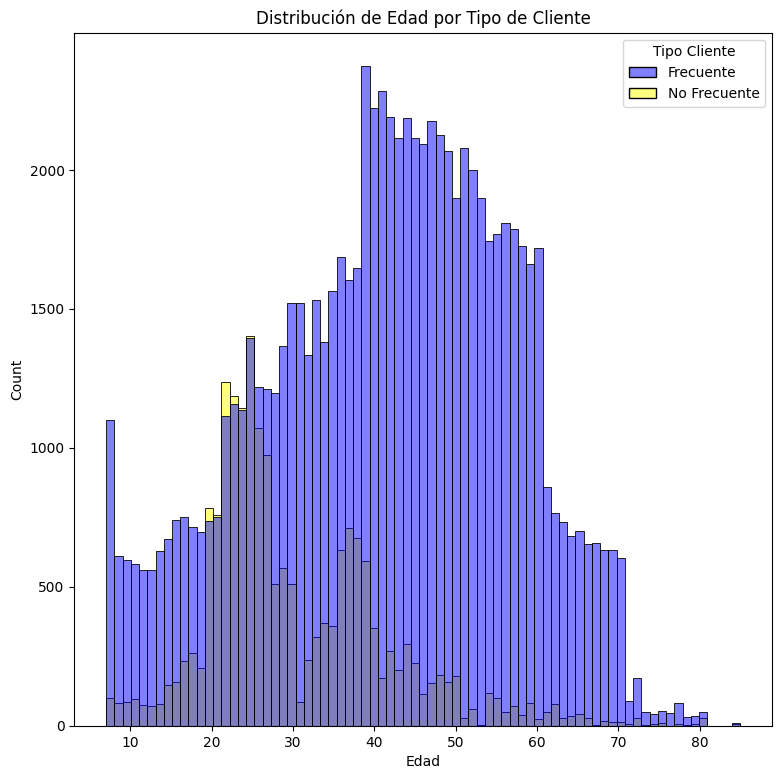

In [127]:
figura, ax = plt.subplots(figsize = (9,9))
sns.histplot(df, x='Edad', hue='Tipo Cliente', palette = colores_tipo_cliente)
ax.set_title('Distribución de Edad por Tipo de Cliente')

plt.show()

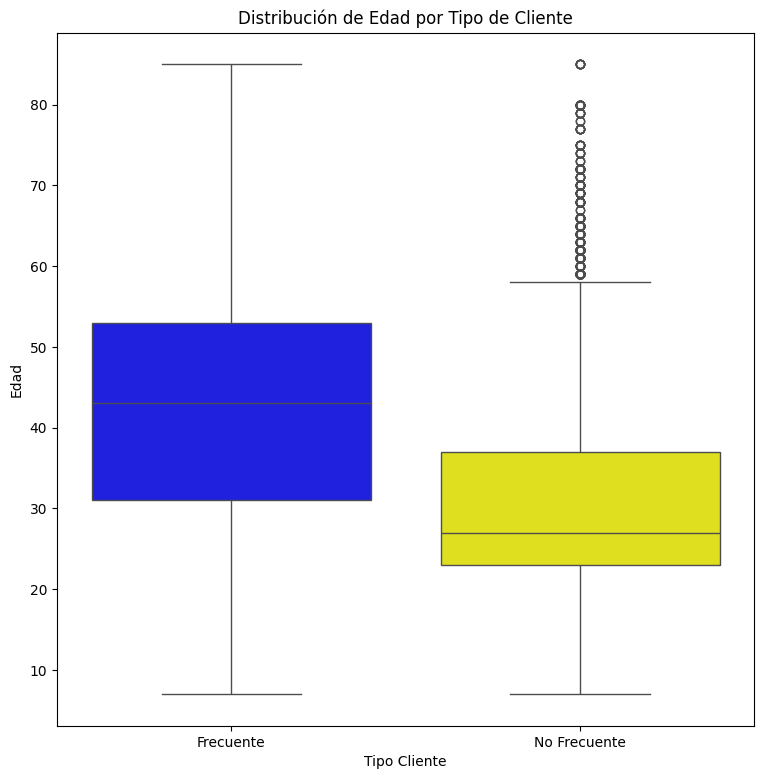

In [128]:
#Analizo mediante un boxplot la distribución de edad para ver outliers
figura, ax = plt.subplots(figsize = (9,9))
sns.boxplot(data=df, x='Tipo Cliente', y='Edad', palette = colores_tipo_cliente)
ax.set_title('Distribución de Edad por Tipo de Cliente')

plt.show()

## Significado de los gráficos
La cantidad de clientes frecuentes es considerablemente mayor a la de los compradores ocasionales. Dentro de los clientes ocasionales hay una variedad de edad mayor, en promedio son menores, pero hay varios existen una cantidad de valores atípicos (outliers)

## Distribución de Edad según Género

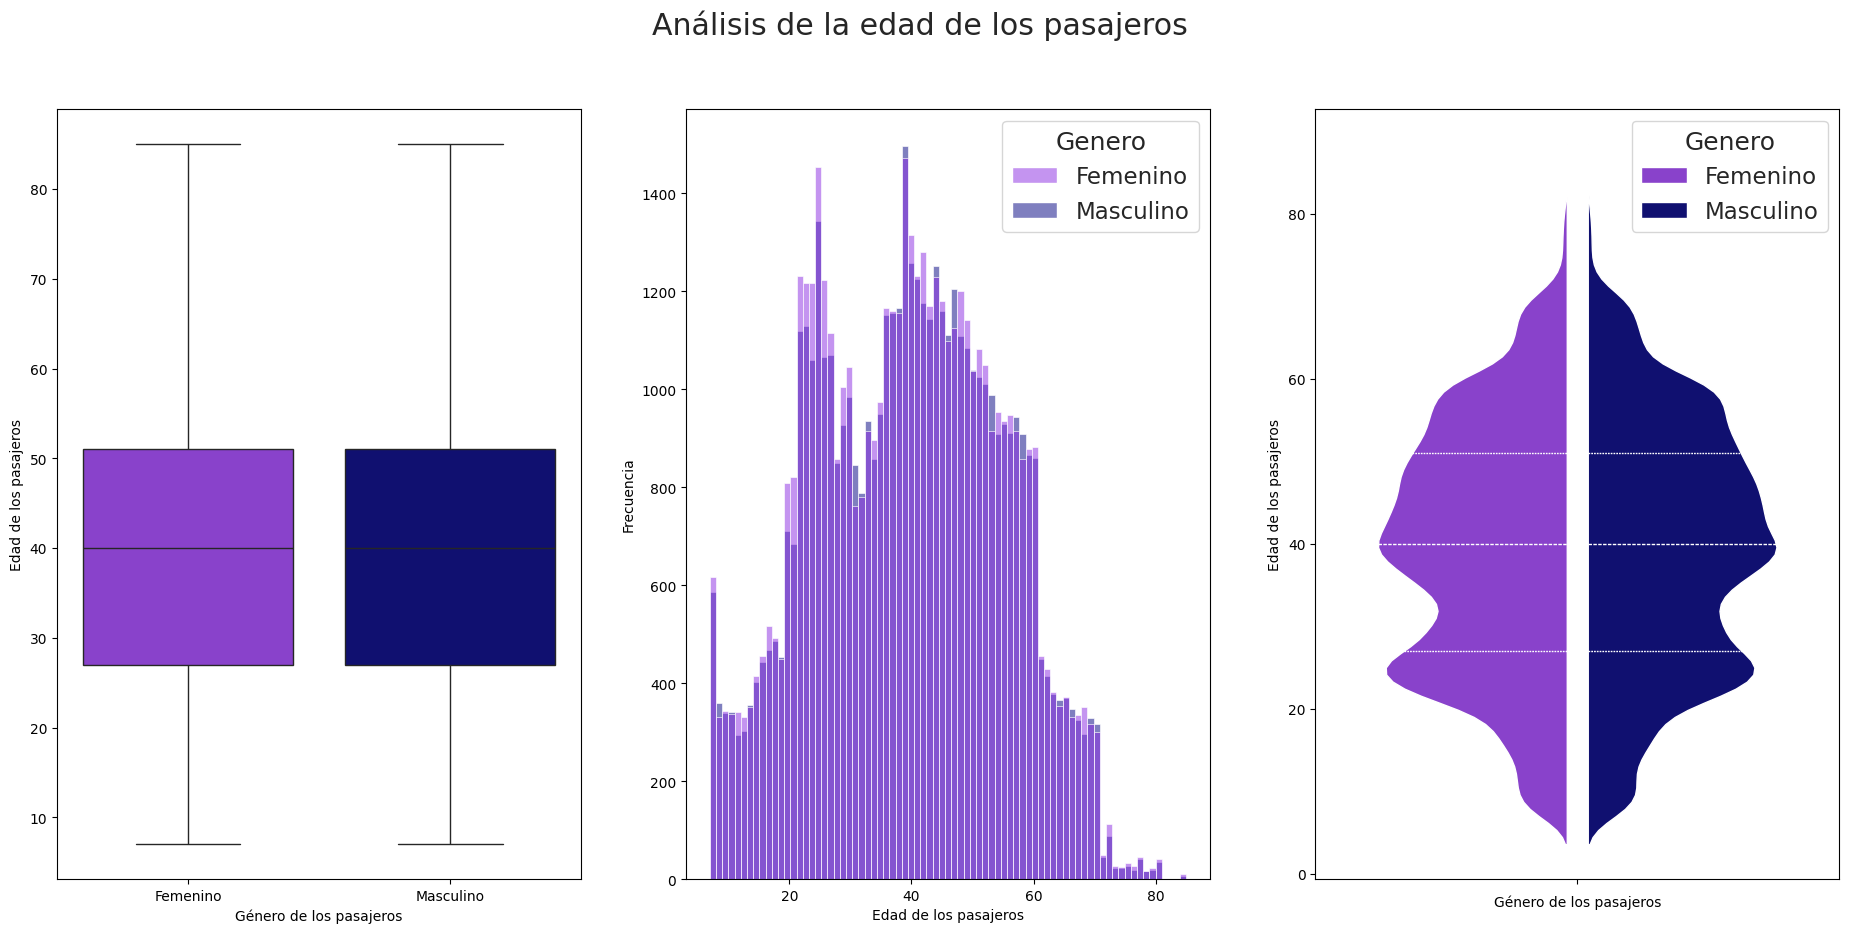

In [129]:
# Se muestra la distribución de edad según el género de tres formas gráficas
# A la izquierda un gráfico de caja
# Al centro un histograma de frecuencia
# A la derecha un gráfico de violín
fig_edad_pasajeros_gral, axes = plt.subplots(1, 3, figsize = (23,10))

sns.set_theme(style = 'ticks', font_scale = 1.5)

sns.boxplot(x = 'Genero', y = 'Edad' , data = df,ax = axes[0], palette=colores_genero)
axes[0].set_ylabel('Edad de los pasajeros')
axes[0].set_xlabel('Género de los pasajeros')

sns.histplot(df, x='Edad', hue='Genero', ax = axes[1], palette = colores_genero)
ax.set_title('Distribución de Edad por Género')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlabel('Edad de los pasajeros')

sns.violinplot(hue = 'Genero', y = 'Edad',data = df, split = True, inner = 'quart', linewidth = 1, ax = axes[2], palette=colores_genero, gap=.1, linecolor='white')
axes[2].set_ylabel('Edad de los pasajeros')
axes[2].set_xlabel('Género de los pasajeros')

fig_edad_pasajeros_gral.suptitle('Análisis de la edad de los pasajeros')

plt.show()

## Significado de los gráficos
En los tres gráficos se puede observar que la distribución por género es balanceada, muy similar, incluso los cuartilos son casi idénticos.
La mayor frecuencia está dada en el entorno de los 39 años y los 25 años

## Distribución de asientos por Clase y Tipo de viaje

In [130]:
distribucion_asientos= (df.groupby(['Clase','Tipo Viaje'])['Tipo Viaje'].count()
                               .to_frame('Cantidad').reset_index().rename(columns={'index':'Tipo Viaje'}))
distribucion_asientos

,Clase,Tipo Viaje,Cantidad
0,Business,Negocios,47508
1,Business,Personal,2157
2,Eco,Negocios,20257
3,Eco,Personal,26488
4,Eco Plus,Negocios,3890
5,Eco Plus,Personal,3604


## Distribución de Tipo de Asiento según Tipo de Viaje

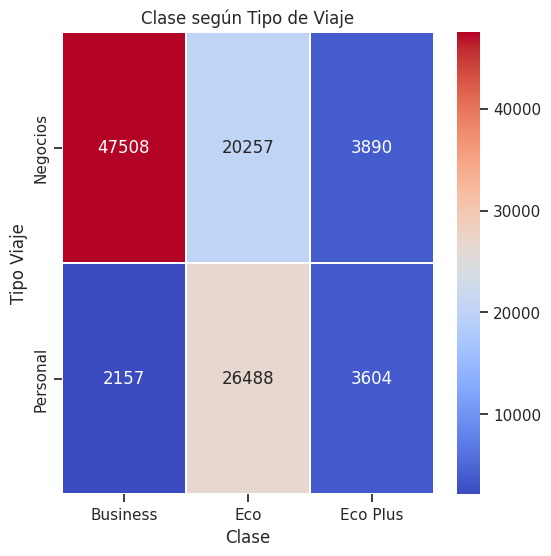

In [132]:
asientos = distribucion_asientos.pivot(index = 'Tipo Viaje', columns = 'Clase', values = 'Cantidad')
fig, ax = plt.subplots(figsize=(6,6))
sns.set_theme(style = 'ticks', font_scale = 1)
mapa_calor = sns.heatmap(asientos, annot=True, fmt = '.0f', linewidths = .2, ax = ax, cmap = 'coolwarm')
mapa_calor.set (xlabel = 'Clase', ylabel = 'Tipo Viaje', title = 'Clase según Tipo de Viaje')

plt.show()

## Significado del gráfico
En este caso es my marcada la mayor frecuencia de los pasajeros que viajan por Negocios en clase Business. Luego le siguen en clase Eco, tanto por Negocios como por motivos Personales.

# Relación entre Satisfacción y las valoraciones de los encuestados

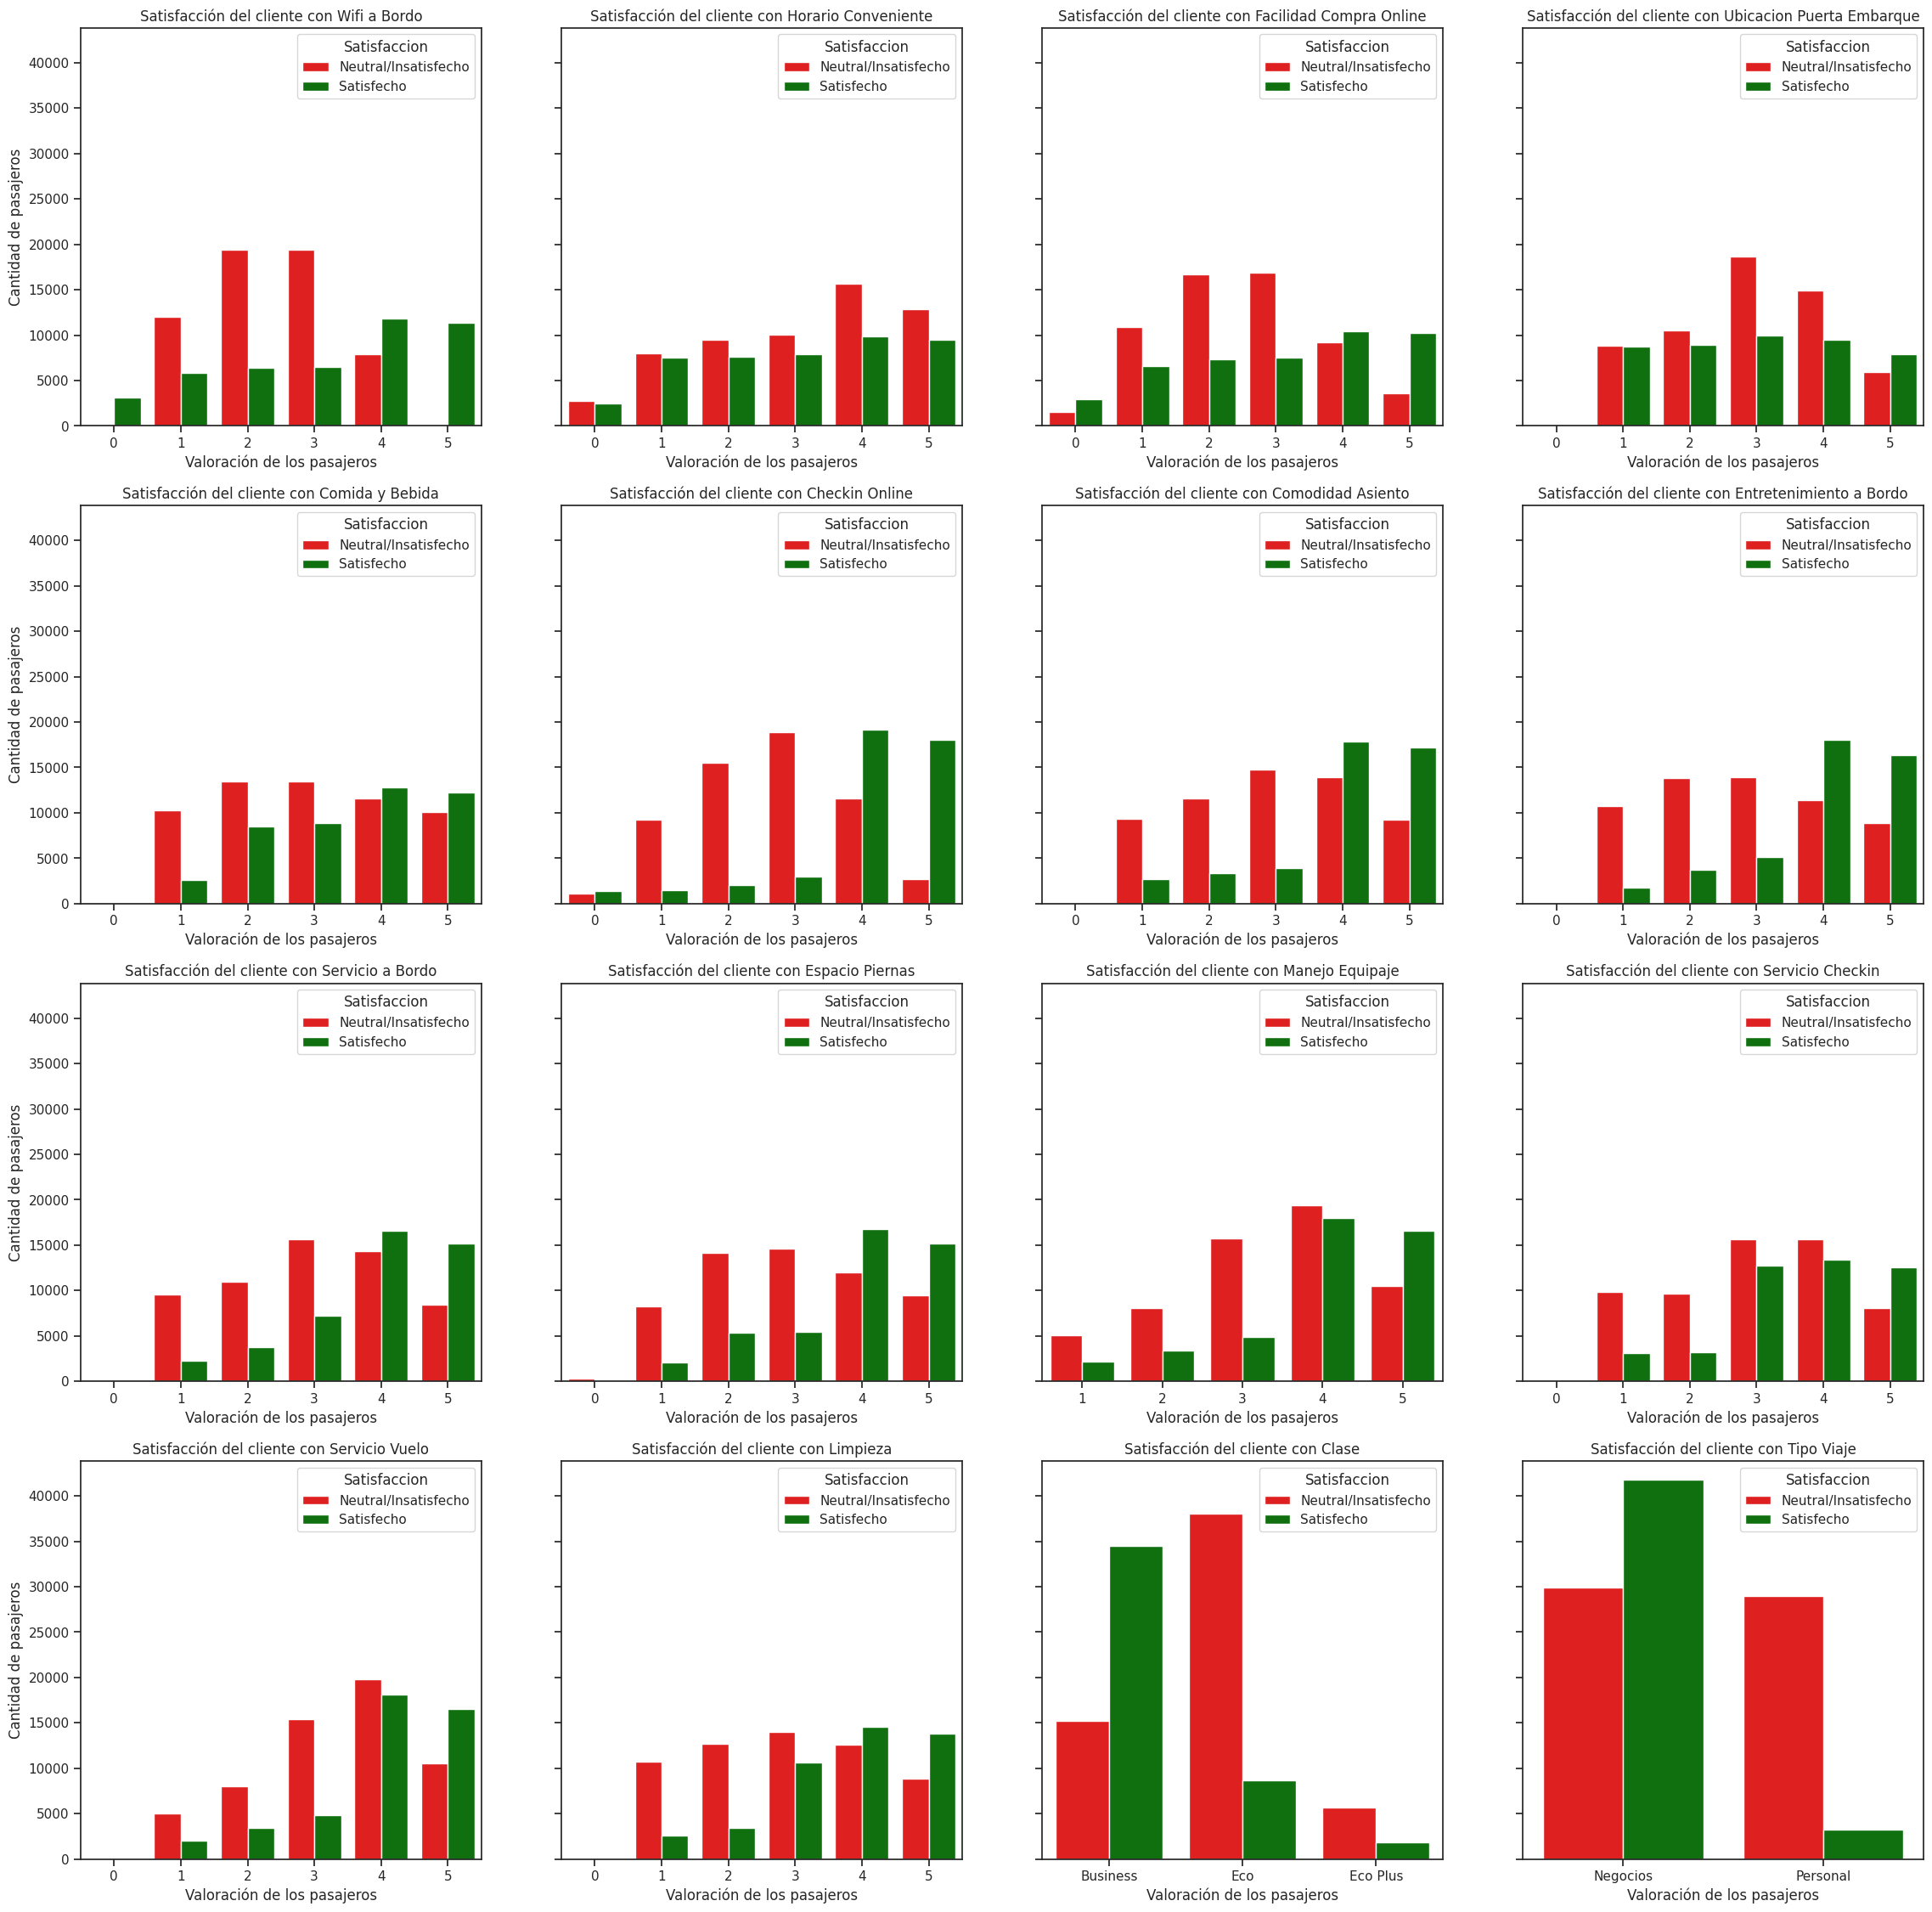

In [133]:
fig, axs = plt.subplots(4, 4, figsize = (28, 28), sharey = True)
colores_satisfaccion = {'Satisfecho':'green', 'Neutral/Insatisfecho':'red'}

for variable, ax in zip(['Wifi a Bordo','Horario Conveniente','Facilidad Compra Online','Ubicacion Puerta Embarque','Comida y Bebida','Checkin Online','Comodidad Asiento','Entretenimiento a Bordo','Servicio a Bordo','Espacio Piernas','Manejo Equipaje','Servicio Checkin','Servicio Vuelo','Limpieza','Clase','Tipo Viaje'], axs.flat):
    # Grafico
    sns.countplot(x = df[variable], hue = df['Satisfaccion'], ax = ax, palette = colores_satisfaccion)
    ax.set_title(f'Satisfacción del cliente con {variable}')
    ax.set(xlabel = 'Valoración de los pasajeros', ylabel = 'Cantidad de pasajeros')

## Significado de los gráficos
- Los pasajeros en oportunidad de un viaje personal, son más susceptibles a sentirse insatisfechos que aquellos que lo hacen por negocios.
- Es muy marcado el nivel de instatisfacción para los pasajeros de clase "Eco", por lo que resulta importante, revisar lo que se le ofrece, para mejorar.
- Se encuentra una relación bastante directa en varios de los tópicos consultados:
	* Wifi a Bordo
	* Facilidad en la Compra Online
	* Check-in Online
	* Comodidad del asiento
	* Entretenimiento a Bordo
	* Servicio a Bordo
	* Espacio para las piernas

# Conclusiones Generales
Los datos analizados por diferentes atributos resultan ser bastante equilibrados.
La relación por género es casi idéntica.
La relación por clase de asiento, da mayor preferencia para Business.
La mayoría de los pasajeros que vuelan en Business lo hacen por Negocios.
La mediana de edad se encuentra alrededor de los 40 años.
Hay una cantidad considerable de pasajeros insatisfechos con los servicios proporcionados.

#Feature Selection
El objetivo es eliminar los campos que no aportan para hacer la predicción y organizarlos adecuadamente para que el modelo no reciba información que no le es útil y que podría provocar predicciones de poca calidad o confianza.

#Pasaje de variables categóricas a código
Con el fin de poder realizar la matriz de correlación y lograr considerar cuales son los items con los cuales me quedaré para el análisis se hace necesaria la codificación de las variables categóricas. También éste procedimiento me permitirá después poder realizar los modelos.

En cuanto al genero, hay dos posibles respuestas que son del tipo string (Masculino/Femenino) por ello se generará un codigo 0 para el Masculino y 1 para el Femenino. Mismo procedimiento se realizará con el tipo de viaje, la clase elegida, el tipo de cliente y con la variable target (satisfacción).

In [134]:
dict_gen={'Masculino':0,'Femenino':1}
df['Genero'] = df.Genero.replace(dict_gen)
dict_viaje={'Personal':0,'Negocios':1}
df['Tipo Viaje'] = df['Tipo Viaje'].replace(dict_viaje)
dict_clase={'Eco':0,'Eco Plus':1,'Business':2}
df['Clase'] = df.Clase.replace(dict_clase)
dict_tipo={'No Frecuente':0,'Frecuente':1}
df['Tipo Cliente'] = df['Tipo Cliente'].replace(dict_tipo)
dict_satisfaccion={'Neutral/Insatisfecho':0,'Satisfecho':1}
df['Satisfaccion'] = df.Satisfaccion.replace(dict_satisfaccion)

#Gráfico de Matriz de Correlación
Para poder visualizar de manera clara la relación existente entre las variables, voy a crear un mapa de calor para identificar visualmente la correlación. Aquí se podrá evaluar la fuerza y la dirección de las relaciones, pudiendo identificar patrones y asociaciones entre datos.

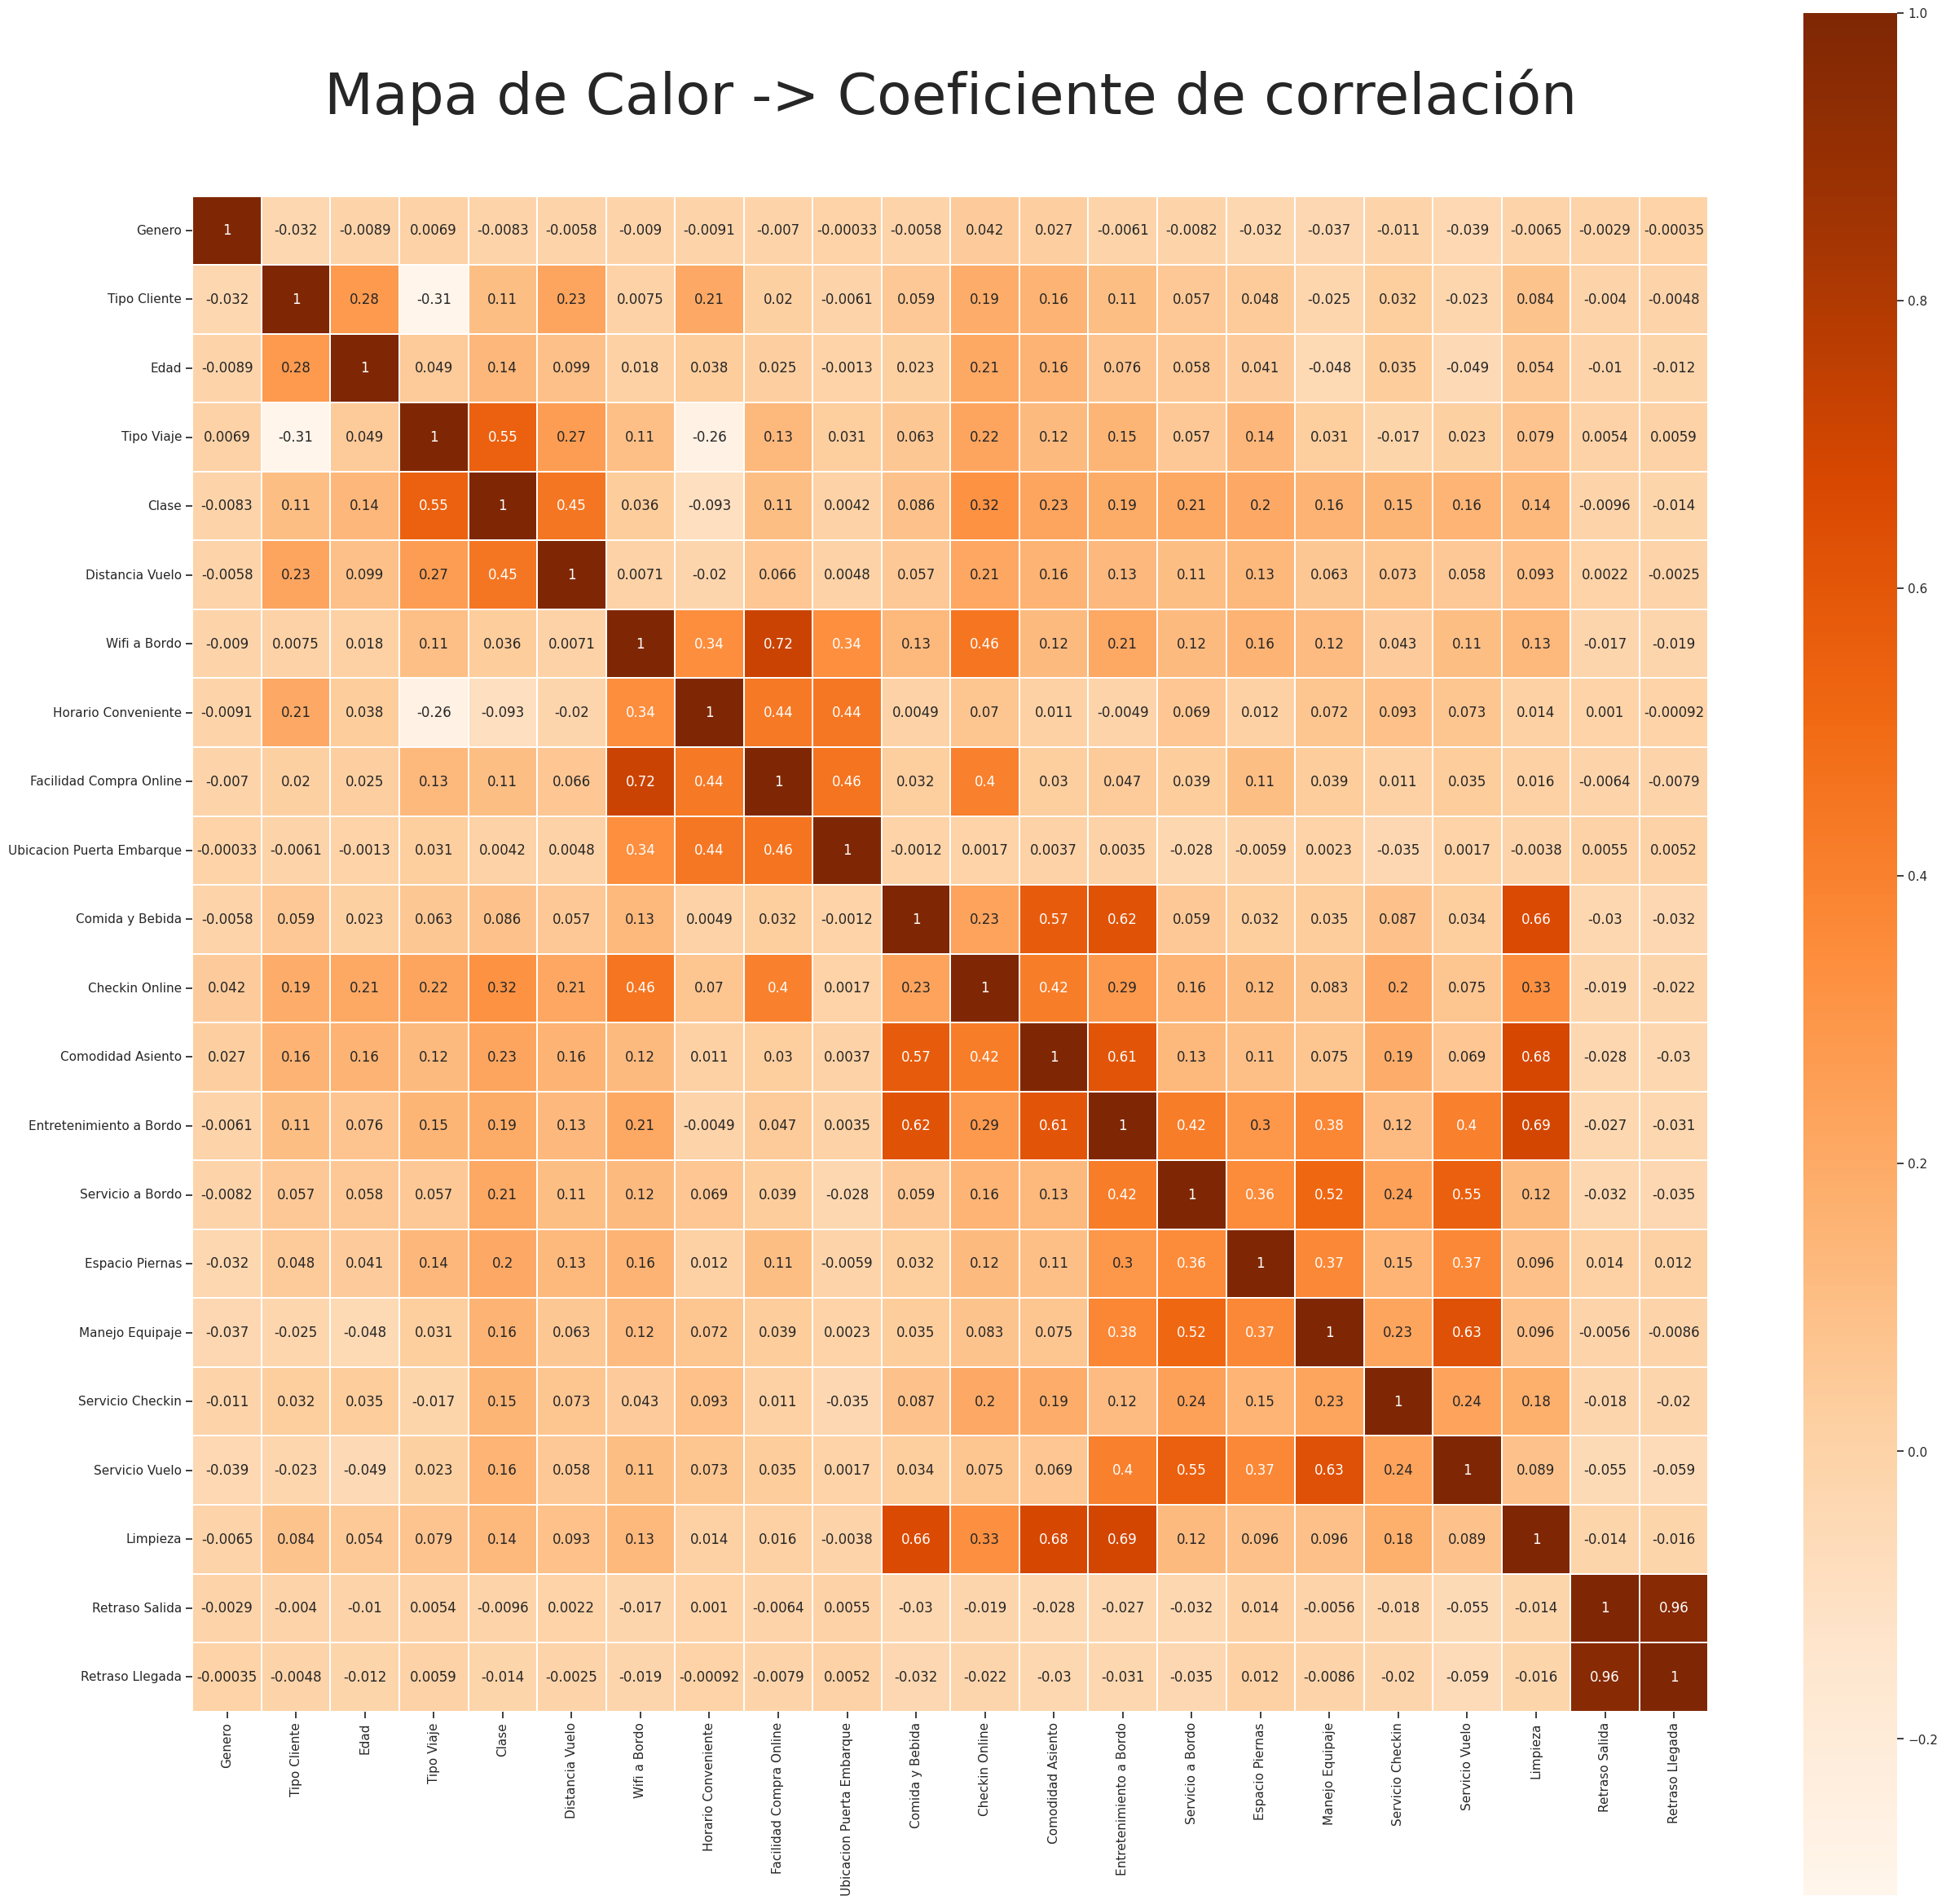

In [135]:
dfaux=df.drop(['Satisfaccion'],axis=1)
mapa = plt.cm.Oranges
plt.figure(figsize=(30,30))
plt.title('Mapa de Calor -> Coeficiente de correlación', y=1.05, size=50)
sns.heatmap(dfaux.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapa, linecolor='white', annot=True)
plt.show()

# Correlación en el Retraso
Vista la gran correlación que existe entre el retraso a la salida con el retraso a la llegada voy a graficar la correlación para ver si es posible eliminar una de las variables

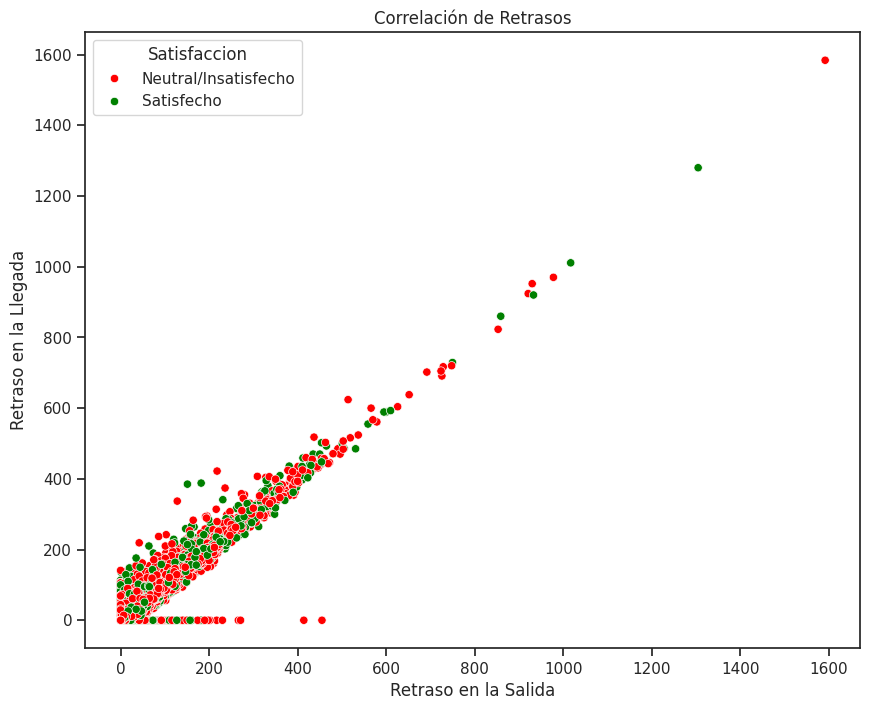

In [136]:
#Grafico la correlación existente entre el retraso en la salida y el restraso en la llegada
#Revierto el cambio de valores categóricos para visualizarlo más claro

df_retraso = df
dict_satisfaccion2={0: 'Neutral/Insatisfecho',1: 'Satisfecho'}
df_retraso['Satisfaccion'] = df_retraso.Satisfaccion.replace(dict_satisfaccion2)

plt.subplots(figsize = (10,8))


sctretraso = sns.scatterplot(x = 'Retraso Salida', y = 'Retraso Llegada', data = df_retraso, hue='Satisfaccion', palette=colores_satisfaccion)
sctretraso.set(xlabel = 'Retraso en la Salida', ylabel = 'Retraso en la Llegada', title = 'Correlación de Retrasos')

plt.show()

## Análisis
De este gráfico se desprende que existe una fuerte correlación entre el retraso en la salida y la llegada. Perfectamente se puede omitir una de las variables y no cambiaría significativamente el resultado obtenido. Se entiende que si el vuelo se retrasó en el despegue es casi seguro que se retrase en la llegada. Por eso voy a eliminar el Retraso en la Llegada.

También los valores de correlación son altos (aprox 0.7) entre:
- Wifi A Bordo y Facilidad Compra Online
- Limpieza y Entretenimiento a Bordo
- Limpieza y Comida y Bebida
- Limpieza y Comodidad Asiento

Las voy a graficar usando un gráfico de dispersión (Scatter)

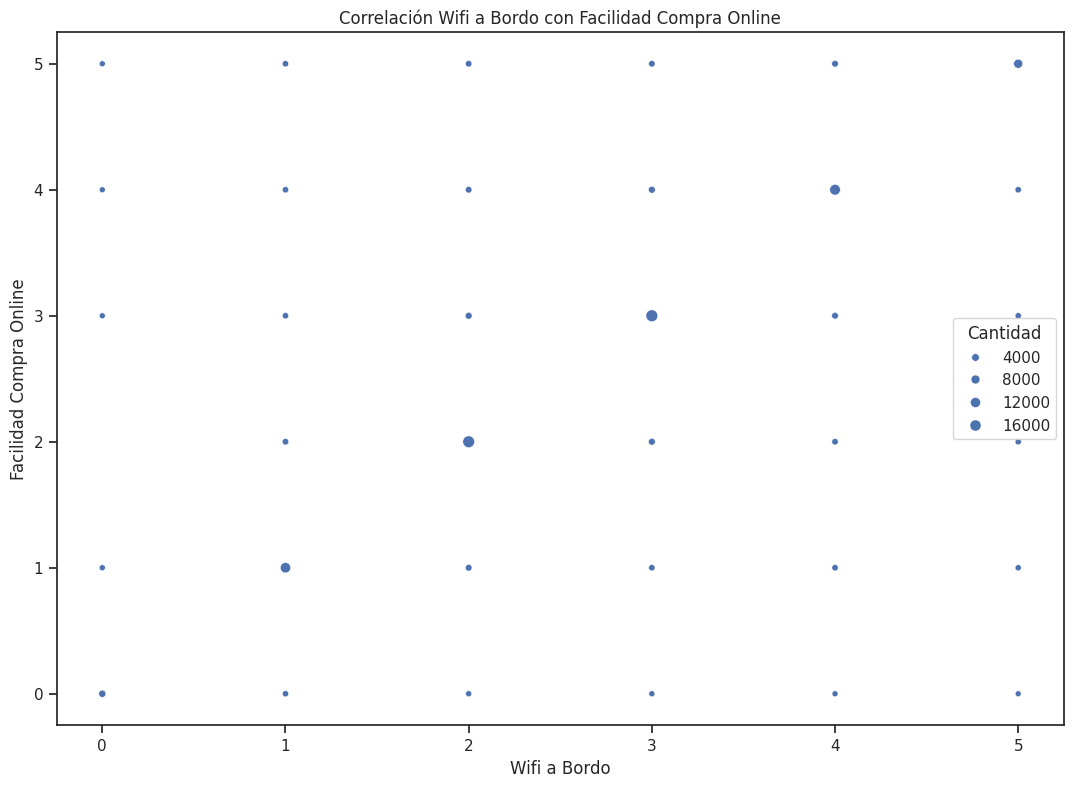

In [137]:
plt.subplots(figsize=(13, 9))
aux_burbuja = df.reset_index().groupby(['Wifi a Bordo', 'Facilidad Compra Online'])['index'].count().to_frame('Cantidad').reset_index()
sctr=sns.scatterplot(x='Wifi a Bordo', y='Facilidad Compra Online', size='Cantidad', data=aux_burbuja)
sctr.set_title("Correlación Wifi a Bordo con Facilidad Compra Online")
plt.show()

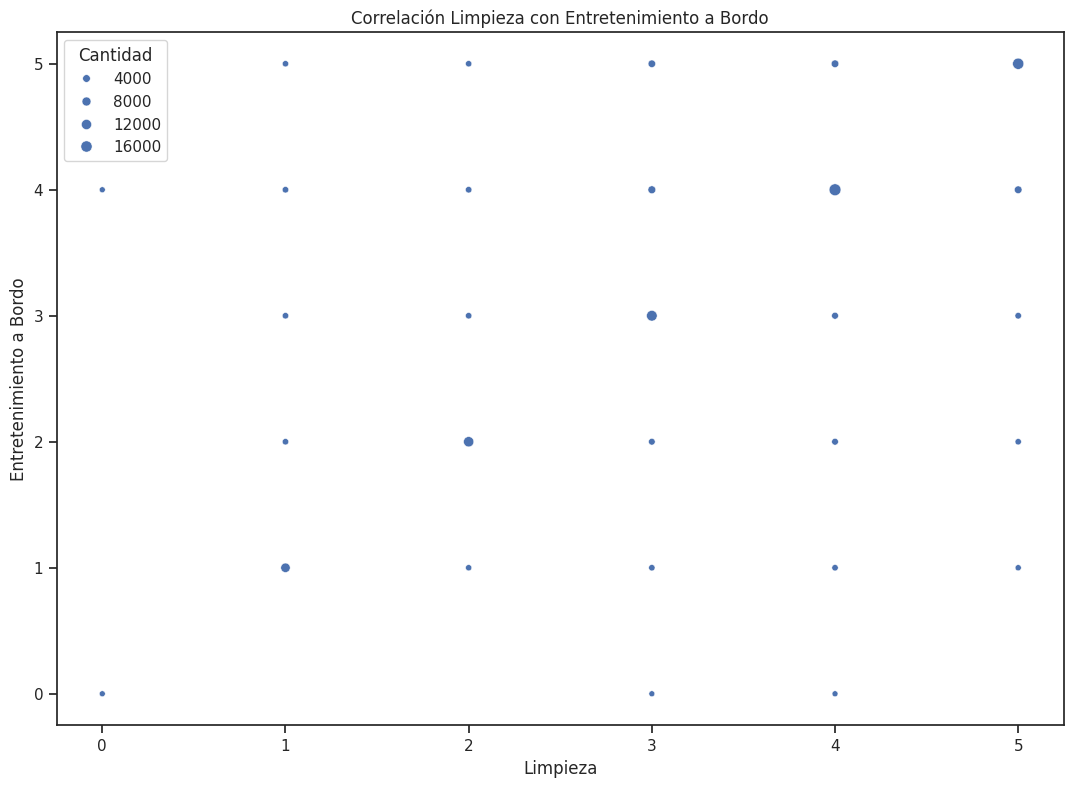

In [139]:
plt.subplots(figsize=(13, 9))
aux_burbuja = df.reset_index().groupby(['Limpieza', 'Entretenimiento a Bordo'])['index'].count().to_frame('Cantidad').reset_index()
sctr=sns.scatterplot(x='Limpieza', y='Entretenimiento a Bordo', size='Cantidad', data=aux_burbuja)
sctr.set_title("Correlación Limpieza con Entretenimiento a Bordo")
plt.show()

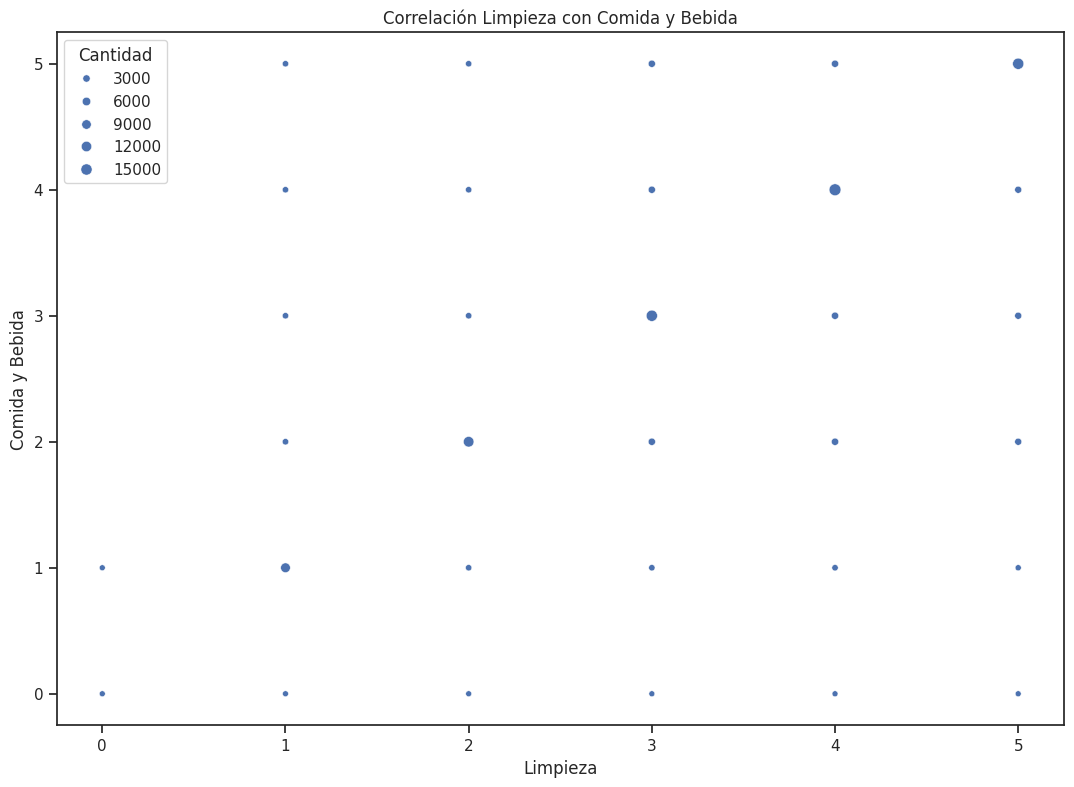

In [140]:
plt.subplots(figsize=(13, 9))
aux_burbuja = df.reset_index().groupby(['Limpieza', 'Comida y Bebida'])['index'].count().to_frame('Cantidad').reset_index()
sctr=sns.scatterplot(x='Limpieza', y='Comida y Bebida', size='Cantidad', data=aux_burbuja)
sctr.set_title("Correlación Limpieza con Comida y Bebida")
plt.show()

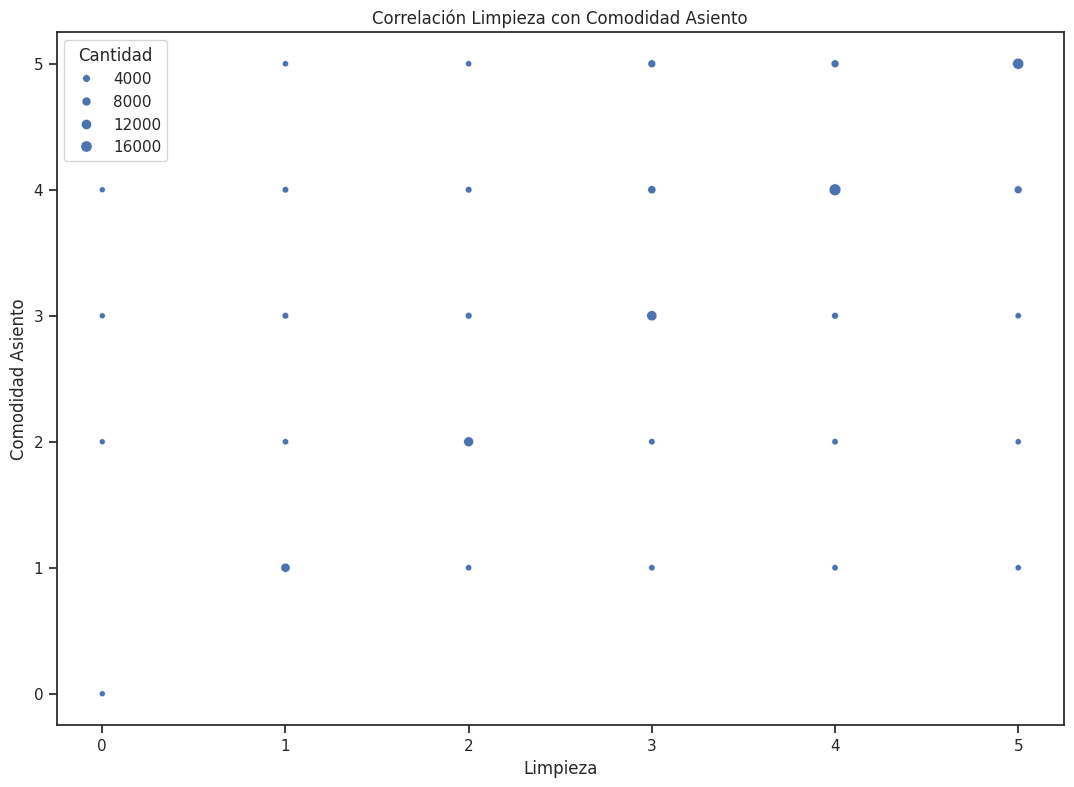

In [141]:
plt.subplots(figsize=(13, 9))
aux_burbuja = df.reset_index().groupby(['Limpieza', 'Comodidad Asiento'])['index'].count().to_frame('Cantidad').reset_index()
sctr=sns.scatterplot(x='Limpieza', y='Comodidad Asiento', size='Cantidad', data=aux_burbuja)
sctr.set_title("Correlación Limpieza con Comodidad Asiento")
plt.show()

## Conclusión
Como se puede ver en los gráficos, la relación que existen entre estas variables es importante, por lo que voy a eliminar la Limpieza y Wifi a Bordo

In [142]:
#Como un método alternativo para analizar la correlación y verificarlo voy a calcular el Coeficiente de Pearson para estas variables
coef_corr = df['Retraso Salida'].corr(df['Retraso Llegada'], method ='pearson')
print('Correlación entre Retraso Salida y Retraso Llegada: ', coef_corr)

Correlación entre Retraso Salida y Retraso Llegada:  0.9602470986642794


In [143]:
coef_corr = df['Wifi a Bordo'].corr(df['Facilidad Compra Online'], method ='pearson')
print('Correlación entre Wifi a Bordo y Facilidad Compra Online: ', coef_corr)

Correlación entre Wifi a Bordo y Facilidad Compra Online:  0.7158561412674359


In [144]:
coef_corr = df['Limpieza'].corr(df['Entretenimiento a Bordo'], method ='pearson')
print('Correlación entre Limpieza y Entretenimiento a Bordo: ', coef_corr)

Correlación entre Limpieza y Entretenimiento a Bordo:  0.6918146374078972


In [145]:
coef_corr = df['Limpieza'].corr(df['Comodidad Asiento'], method ='pearson')
print('Correlación entre Limpieza y Comodidad Asiento: ', coef_corr)

Correlación entre Limpieza y Comodidad Asiento:  0.6785339135418769


In [146]:
coef_corr = df['Limpieza'].corr(df['Comida y Bebida'], method ='pearson')
print('Correlación entre Limpieza y Comida y Bebida: ', coef_corr)

Correlación entre Limpieza y Comida y Bebida:  0.6577597343070556


#Selección de Features
Con el fin de poder efocar el análisis correctamente es que se seleccionan todos los features relevantes, dejando fuera aquellos que no me agregan valor al analisis como ser Género y Ubicacion Puerta Embarque. En este caso se da más relevancia a aquellas columnas que tienen una cierta correlación que hacen suponer que ayudarán a realizar un mejor análisis. Esto es así ya que se observa, de los análisis previos, que aquellas personas que valoran de una forma más positiva al servicio prestado seran aquellos que más satisfechos están y aquellos que valoran de manera menos positiva son aquellos que estan desconformes con el servicio.

Cabe aclarar que también se deja de lado Retraso Llegada, Horario Conveniente, Limpieza y Wifi a Bordo debido a la alta correlación existente entre estas y otras de las variables, siguiendo lo que se explico anteriormente en este trabajo. Se tiene en cuenta además, de los motivos expuestos, que se descartan estas variables ya que reduce la capacidad de generalizar que tiene el modelo así como también podría llegar a reducir la precisión.

Por lo expuesto es que se toma una variable target (que posteriormente pasará a ser la Y de nuestro análisis), Satisfaccion.

In [147]:
#Se genera un nuevo dataframe con los features seleccionados y la variable target
df_analisis=pd.DataFrame()

df_analisis['Tipo Cliente']=df['Tipo Cliente']
df_analisis['Edad']=df['Edad']
df_analisis['Tipo Viaje']=df['Tipo Viaje']
df_analisis['Clase']=df['Clase']
df_analisis['Distancia Vuelo']=df['Distancia Vuelo']
df_analisis['Facilidad Compra Online']=df['Facilidad Compra Online']
df_analisis['Comida y Bebida']=df['Comida y Bebida']
df_analisis['Checkin Online']=df['Checkin Online']
df_analisis['Comodidad Asiento']=df['Comodidad Asiento']
df_analisis['Entretenimiento a Bordo']=df['Entretenimiento a Bordo']
df_analisis['Servicio a Bordo']=df['Servicio a Bordo']
df_analisis['Espacio Piernas']=df['Espacio Piernas']
df_analisis['Manejo Equipaje']=df['Manejo Equipaje']
df_analisis['Servicio Checkin']=df['Servicio Checkin']
df_analisis['Servicio Vuelo']=df['Servicio Vuelo']
df_analisis['Retraso Salida']=df['Retraso Salida']
df_analisis['Satisfaccion']=df['Satisfaccion']
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Tipo Cliente             103904 non-null  category
 1   Edad                     103904 non-null  int64   
 2   Tipo Viaje               103904 non-null  category
 3   Clase                    103904 non-null  category
 4   Distancia Vuelo          103904 non-null  int64   
 5   Facilidad Compra Online  103904 non-null  int64   
 6   Comida y Bebida          103904 non-null  int64   
 7   Checkin Online           103904 non-null  int64   
 8   Comodidad Asiento        103904 non-null  int64   
 9   Entretenimiento a Bordo  103904 non-null  int64   
 10  Servicio a Bordo         103904 non-null  int64   
 11  Espacio Piernas          103904 non-null  int64   
 12  Manejo Equipaje          103904 non-null  int64   
 13  Servicio Checkin         103904 non-null  in

In [148]:
#Se selecciona la variable target
x = df_analisis.drop(['Satisfaccion'],axis=1)
y = df_analisis['Satisfaccion']
x.shape

(103904, 16)

#Separación entre Train y Test
Se separará en dos grupos, uno de entrenamiento (Train) y otro de testeo (Test) (ambos x e y), la proporción que se elige es 70% para train y 30% para test. A su vez, para lograr mantener la proporción existente en las respuestas de satisfacción, tanto en train como en test, lo que se hace es usar la técnica de estratifiación (stratify) que permite lograr esto. También se aplicará el parámetro random_state con la finalidad de producir una semilla que permita que los resultados se puedan replicar.

In [149]:
rng = np.random.RandomState(60)
xentrenamiento, xtesteo,yentrenamiento,ytesteo = train_test_split(x,y, test_size=0.30, random_state=rng,stratify=y)

Creo un SimpleImputer para reemplazar los valores faltantes con la media de cada columna. Primero, se ajusta el imputer al conjunto de entrenamiento (X_train) y transforma los datos, reemplazando los valores faltantes con las medias correspondientes. Luego, aplica esta transformación al conjunto de prueba (X_test), utilizando las medias calculadas del conjunto de entrenamiento. Esto garantiza una imputación consistente y evita sesgos introducidos por el conjunto de prueba. Los resultados son X_train_imputed y X_test_imputed, donde los valores faltantes han sido reemplazados por las medias.

In [150]:
imputer = SimpleImputer(strategy='mean')
xentrenamiento_imputed = imputer.fit_transform(xentrenamiento)
xtesteo_imputed = imputer.transform(xtesteo)

#Estandarización de Características
Se busca normalizar los datospara que todas las características contribuyan de manera equilibrada en el modelo.
## Mejora del Rendimiento del Modelo
Para algunos modelos como KNN, que están basados en la distancia entre puntos, estandarizar puede mejorar sensiblemente el rendimiento.
##Consistencia
De esta manera nos podemos asegurar que los datos de entrenamiento como los de pureban estén en la misma escala, así, el modelo puede generalizar de mejor manera y evitar problemas de rendimiento a causa de diferentes escalas en los datos.

In [151]:
scaler = StandardScaler()
xentrenamiento_scaled = scaler.fit_transform(xentrenamiento_imputed)
xtesteo_scaled = scaler.transform(xtesteo_imputed)

#Modelos:



##Árbol de Decisión (Decision Tree)
El modelo de Árbol de Decisión puede ser utilizado tanto para problemas de Clasificación como de Regresión.

In [153]:
start=time.time()
dtc = DecisionTreeClassifier()
dtc.fit(xentrenamiento_scaled, yentrenamiento)
y_pred = dtc.predict(xtesteo_scaled)
acc = dtc.score(xtesteo_scaled, ytesteo)
end = time.time()
demora = end-start

print("Accuracy: ", round(acc * 100, 1),"%. Demora ", round(demora,1), " segundos")

Accuracy:  90.9 %. Demora  2.6  segundos


#Resultado
El Accuracy logrado fue de casi 91% y la demora fue de solo 1 segundo, lo que lo hace un buen modelo.

##KNN: K-Nearest-Neigbor (Vecinos Cercanos)
Este algoritmo, puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Sirve esencialmente para clasificar valores, buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento del modelo y haciendo conjeturas de nuevos puntos basado en esa clasificación o regresión.

In [154]:
start=time.time()
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xentrenamiento_scaled, yentrenamiento)
y_pred = knn.predict(xtesteo_scaled)
end=time.time()
demora = end-start
acc = accuracy_score(ytesteo, y_pred)

print("Accuracy con K=3: ", round(acc * 100, 2),"%. Demora ", round(demora,1), " segundos")

Accuracy con K=3:  91.09 %. Demora  14.6  segundos


In [155]:
start=time.time()
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xentrenamiento_scaled, yentrenamiento)
y_pred = knn.predict(xtesteo_scaled)
end=time.time()
demora = end-start
acc = accuracy_score(ytesteo, y_pred)

print("Accuracy con K=5: ", round(acc * 100, 2),"%. Demora ", round(demora,1), " segundos")

Accuracy con K=5:  91.3 %. Demora  16.7  segundos


##Resultado
El modelo con k=3 tiene un accuracy de 91.09% y con un k=5 de 91.3%, siendo que la demora entre varias pruebas que realicé fue muy similar (ambos entre 14 y 18 segundos), no es muy significativa la diferencia de la demora ni la diferencia en el accuracy logrado, podríamos utilizar cualquiera de los dos, el modelo logra predecir con un alto porcentaje de acierto.

Podemos concluir que esta es una buena alternativa para un problema de Clasificación.

#Regresión Logística
La Regresión Logística o también conocida como Logistic Regression, es una técnica de aprendizaje automático que proviene del campo de la estadística. A pesar de su nombre no es un algoritmo para aplicar en problemas de regresión, en los que se busca un valor continuo, sino que es un método para problemas de clasificación, en los que se obtienen un valor binario entre 0 y 1.


In [156]:
start=time.time()
reg_log = LogisticRegression()
reg_log.fit(xentrenamiento_scaled, yentrenamiento)
acc = reg_log.score(xtesteo_scaled, ytesteo)
end=time.time()
demora = end-start

print("Accuracy: ", round(acc * 100, 1),"%. Demora ", round(demora,1), " segundos")

Accuracy:  87.0 %. Demora  0.4  segundos


##Resultado
En el caso de la Regresión Logística el accuracy logrado fue de un 87%. La demora es menor al segundo.

##SVM (Support Vector Machine)
Este algoritmo es utilizado en problemas de clasificación múltiple y regresión.

El modelo se fundamenta en el Maximal Margin Classifier, basado en el concepto de hiperplano.

Debido a la utilización de kernels, donde en el ajuste se utiliza una matriz de n x n, donde n es el número de observaciones, termina resultando en un costo computacional más elevado


In [157]:
start = time.time()
svm = SVC()
svm.fit(xentrenamiento_scaled, yentrenamiento)
acc = svm.score(xtesteo_scaled, ytesteo)
end = time.time()
demora = end - start

print("Accuracy: ",round(acc*100,1),"%. Demora ",round(demora,1)," segundos")

Accuracy:  92.9 %. Demora  127.6  segundos


##Resultado
En el caso de SVM el Accuracy logrado fue de un 92.9%, mientras que la demora fue de 128 segundos.

#Conclusión
En el análisis realizado, se implementaron varios de los modelos vistos en clase y alguno que no, con el objetivo de predecir el nivel de satisfacción de los pasajeros de la aerolínea.

Los cuatro modelos utilizados fueron entrenados con los mismos datos, logrando resultados de Accuracy que van desde 87% hasta 92.9%, mientras que las demoras fueron desde menos de un segundo hasta unos 128 segundos.

La mayor precisión la logró el modelo SVM (92.9%), pero con un costo de cómputo grande (128 segundos).

En la medida que el número de datos de entrenamiento no crezca de manera importante, creo que vale la pena hacer un uso mayor de cómputo para mejorar el porcentaje de acierto del modelo.

Si aumenta el número de datos, vale la pena perder un poco de precisión, utilizando el modelo KNN, ya que es mucho más eficiente en el consumo de cómputo.